In [2]:
# import all required packages 
 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
# read the file and collect basic information about file 
uber_req_df = pd.read_csv(r"C:\Users\Cheenu\Documents\upGrad\UberAssignment\SourceFile\Uber Request Data.csv") 
 
print(uber_req_df.columns) 
print("---------------------------------------------------------------------") 
print(uber_req_df.info()) 
print("---------------------------------------------------------------------") 
print(uber_req_df.describe()) 

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')
---------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None
---------------------------------------------------------------------
        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


In [5]:
# creating a list for renaming given column name by standardized column name 
 
req_column_nm = {'Request id':'REQUEST_ID', 'Pickup point':'PICKUP_LOC', 'Driver id':'DRIVER_ID', 'Status':'TRIP_STATUS', 
       'Request timestamp':'REQUEST_TS', 'Drop timestamp':'DROP_TS'} 
 
uber_req_df.rename(columns=req_column_nm,inplace=True) 
 
# Only Airport and City present as expected from problem statement 
print(uber_req_df['TRIP_STATUS'].unique()) 
print("---------------------------------------------------------------------") 
 
 
# Only Airport and City present as expected from problem statement 
print(uber_req_df['PICKUP_LOC'].unique()) 
print("---------------------------------------------------------------------") 
 
print(uber_req_df['DRIVER_ID'].unique())  
#Driver ID has nan when the car is not available. Have to handle nan and also the driver id is float, can make it int 
 
# update nan in driver id with -1, assuming -1 ID is not provided to any driver 
uber_req_df.DRIVER_ID.fillna(-1,inplace=True) 
print("---------------------------------------------------------------------") 
 
print(uber_req_df['DRIVER_ID'].unique())  
 
 
#update the given column name and its data type 
 
req_column_dtype = {'REQUEST_ID':int, 'PICKUP_LOC':object, 'DRIVER_ID':int, 'TRIP_STATUS':object} 
uber_req_df = uber_req_df.astype(req_column_dtype) 
 
 
print(uber_req_df['DROP_TS'].unique())  
print("---------------------------------------------------------------------") 
print(uber_req_df['REQUEST_TS'].unique())  

['Trip Completed' 'Cancelled' 'No Cars Available']
---------------------------------------------------------------------
['Airport' 'City']
---------------------------------------------------------------------
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156

In [6]:
# Data format is not uniform and it is of object type 
 
 
# Convert to Datetime format 
uber_req_df['REQUEST_TS'] = pd.to_datetime(uber_req_df['REQUEST_TS']) 
uber_req_df['DROP_TS'] = pd.to_datetime(uber_req_df['DROP_TS']) 
 
print(uber_req_df['DROP_TS'].unique())  
print("---------------------------------------------------------------------") 
print(uber_req_df['REQUEST_TS'].unique())  

['2016-11-07T13:00:00.000000000' '2016-11-07T18:47:00.000000000'
 '2016-12-07T09:58:00.000000000' ... '2016-07-13T23:43:13.000000000'
 '2016-07-15T09:56:07.000000000'                           'NaT']
---------------------------------------------------------------------
['2016-11-07T11:51:00.000000000' '2016-11-07T17:57:00.000000000'
 '2016-12-07T09:17:00.000000000' ... '2016-07-15T23:52:06.000000000'
 '2016-07-15T23:54:39.000000000' '2016-07-15T23:55:03.000000000']


In [7]:
# creating new column hour basd on the request time 
uber_req_df['REQUEST_HOUR'] = uber_req_df['REQUEST_TS'].dt.hour 
 
uber_req_df = uber_req_df.astype({'REQUEST_HOUR':int}) 
 
# creating timeslot of the day based on the hour  
time_slot = {'02_Early Morning':[4,5,6],'03_Morning':[7,8,9],'04_Late Morning':[10,11],'05_Early Afternoon':[12,13,14], 
'06_Late Afternoon':[15,16],'07_Early Evening':[17,18,19],'08_Late Evening':[20,21,22,23],'01_Midnight':[0,1,2,3]} 
 
req_time_slot = {time: slot for slot,interval in time_slot.items() for time in interval} 
 
uber_req_df['REQUEST_TIMESLOT'] = uber_req_df['REQUEST_HOUR'].map(req_time_slot) 

# Creating new column indicating which type of trip it is, Airport to City (or) City to Airport 
 
uber_req_df['REQUEST_TRIP'] = uber_req_df['PICKUP_LOC'].apply(lambda x: 'City to Airport'  
                                                              if x == 'City' else 'Airport to City') 
 
 
# Creating new column indicating Whether cars are available or not 
uber_req_df['REQ_STATUS'] = uber_req_df['TRIP_STATUS'].apply(lambda x: 'No Cars Available'  
                                                             if x == 'No Cars Available' else 'Cars Available') 
 
 
print(uber_req_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
REQUEST_ID          6745 non-null int32
PICKUP_LOC          6745 non-null object
DRIVER_ID           6745 non-null int32
TRIP_STATUS         6745 non-null object
REQUEST_TS          6745 non-null datetime64[ns]
DROP_TS             2831 non-null datetime64[ns]
REQUEST_HOUR        6745 non-null int32
REQUEST_TIMESLOT    6745 non-null object
REQUEST_TRIP        6745 non-null object
REQ_STATUS          6745 non-null object
dtypes: datetime64[ns](2), int32(3), object(5)
memory usage: 448.0+ KB
None


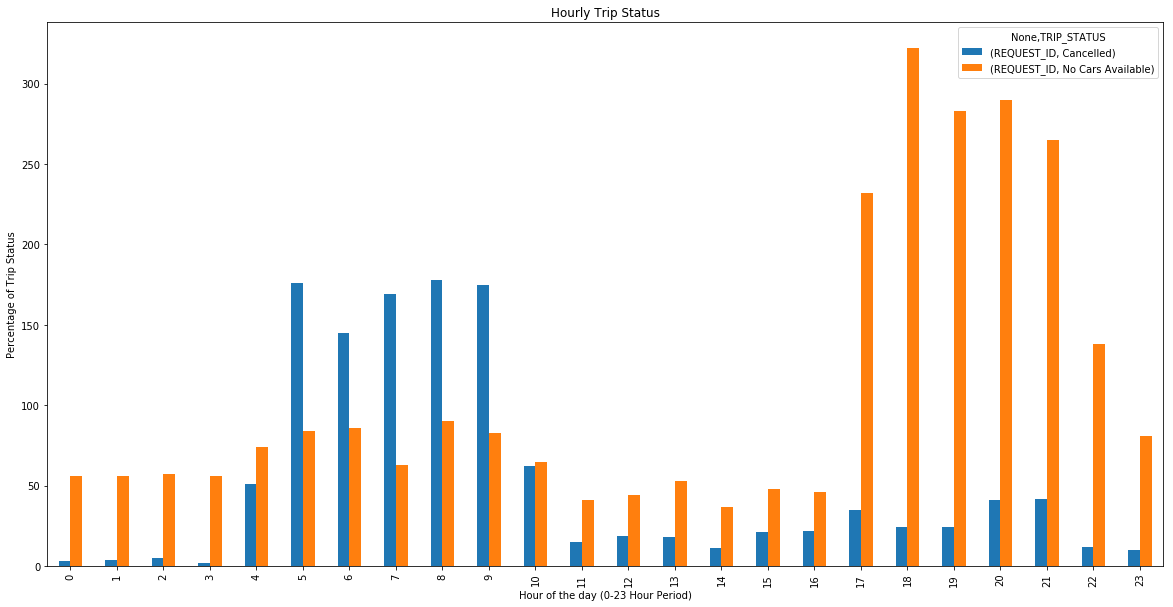

In [8]:
# To Identify the Frequency of requests gets cancelled or No car available 
 
#step 1: Filter all Trip completed requests 
req_can_nocar = uber_req_df.loc[uber_req_df['TRIP_STATUS'] != 'Trip Completed'] 
 
#step 2: Create pivot table to calculate the count of requests in each type - cancelled vs no car available 
 
req_freq_can_nocar = req_can_nocar.pivot_table(index=["REQUEST_HOUR","TRIP_STATUS"],values="REQUEST_ID",aggfunc="count") 
 
#step 3: plot the result to the bar chart 
 
req_freq_can_nocar.unstack().plot(kind='bar', stacked=False, figsize=(20,10), title = "Hourly Trip Status") 
plt.xlabel("Hour of the day (0-23 Hour Period)") # x-axis label 
plt.ylabel("Percentage of Trip Status") # y-axis label 
plt.show() 

      REQUEST_TRIP        TRIP_STATUS  REQUEST_ID
0  Airport to City          Cancelled    6.114886
1  Airport to City  No Cars Available   52.903027
2  Airport to City     Trip Completed   40.982088
      REQUEST_TRIP        TRIP_STATUS  REQUEST_ID
0  City to Airport          Cancelled   30.396350
1  City to Airport  No Cars Available   26.717993
2  City to Airport     Trip Completed   42.885657


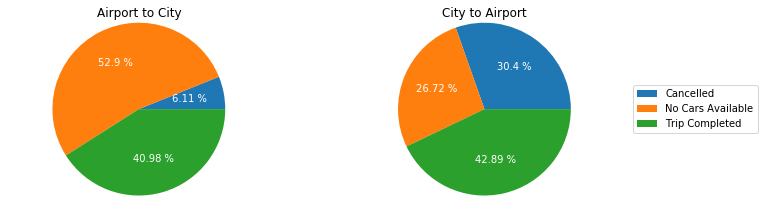

In [37]:
# To Identify the Most problematic type of request 
 
# step 1: Identify the count of requests by Trip status  
 
uber_trip_bystat = uber_req_df.groupby(by=['REQUEST_TRIP','TRIP_STATUS']).agg({'REQUEST_ID':'count'}) 
 
#step 2: Identify the percentage % as count sometime mis-lead  
 
uber_trip_bystat_pct = uber_trip_bystat.groupby(level=0).apply(lambda x : 100 * x / x.sum()) 
 
#Step 3: Fetch only Airport to City Trip 
uber_req_trip_city = uber_trip_bystat_pct.iloc[ 
    uber_trip_bystat_pct.index.get_level_values('REQUEST_TRIP') == 'Airport to City'] 
 
#Step 3: Fetch only City to Airport Trip 
uber_req_trip_airport = uber_trip_bystat_pct.iloc[ 
    uber_trip_bystat_pct.index.get_level_values('REQUEST_TRIP') == 'City to Airport'] 
 

# Define function to format the number in pie 
def absolute_value(val): 
    a  = np.round(val,2) 
    return "{0} %".format(a) 
 

uber_req_trip_city = uber_req_trip_city.reset_index()

uber_req_trip_city
fig = plt.figure() 
 
# Sort the values so that both the pie chart looks same 
uber_req_trip_city = uber_req_trip_city.sort_values(by=uber_req_trip_city.columns[1]) 
print(uber_req_trip_city)
ax_city = fig.add_axes([0, 2, .5, .5], aspect = 1) 
ax_city.pie(uber_req_trip_city["REQUEST_ID"], labels=uber_req_trip_city["TRIP_STATUS"], autopct=absolute_value,radius=1.5,textprops=dict(color="w")); 
ax_city.set_title("Airport to City",pad=20) 

uber_req_trip_airport = uber_req_trip_airport.reset_index()
print(uber_req_trip_airport)
uber_req_trip_airport = uber_req_trip_airport.sort_values(by=uber_req_trip_airport.columns[1]) 

ax_airport = fig.add_axes([0.8, 2, .5, .5], aspect = 1) 
ax_airport.pie(uber_req_trip_airport["REQUEST_ID"], labels=uber_req_trip_airport["TRIP_STATUS"], 
               autopct=absolute_value,radius=1.5,textprops=dict(color="w")); 
ax_airport.set_title("City to Airport",pad=20) 
 
ax_airport.legend(uber_req_trip_city['TRIP_STATUS'],
                  bbox_to_anchor=(1.5, 0, 0.5, 1),loc="center left") 
 
plt.show() 

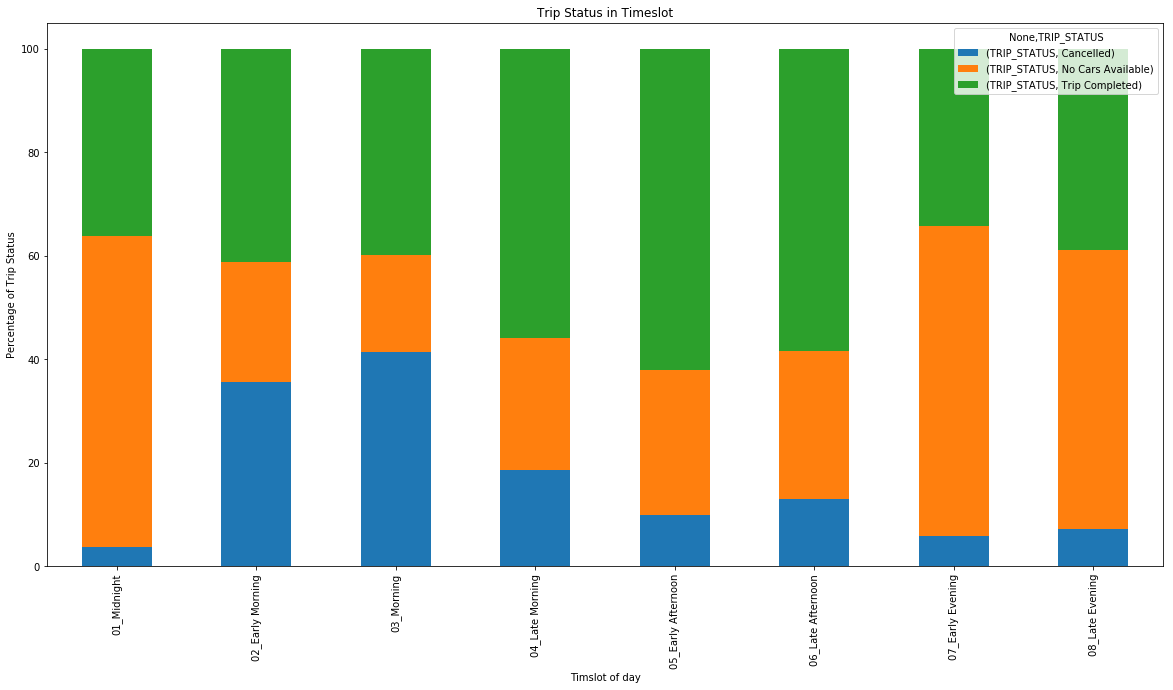

In [38]:
# To Identify the problematic timeslot 
#   Have Considered all types of request - completed, cancelled and no car 
 
uber_trip_bytimeslot = uber_req_df.groupby(by=['REQUEST_TIMESLOT','TRIP_STATUS']).agg({'TRIP_STATUS': 'count'}) 
 
uber_trip_bytimeslot_pct = uber_trip_bytimeslot.groupby(level=0).apply(lambda x : 100 * x / x.sum()) 
ax = uber_trip_bytimeslot_pct.unstack().plot(kind='bar', stacked=True, figsize=(20,10), title = "Trip Status in Timeslot") 
plt.xlabel("Timslot of day") 
plt.ylabel("Percentage of Trip Status") 
plt.show() 

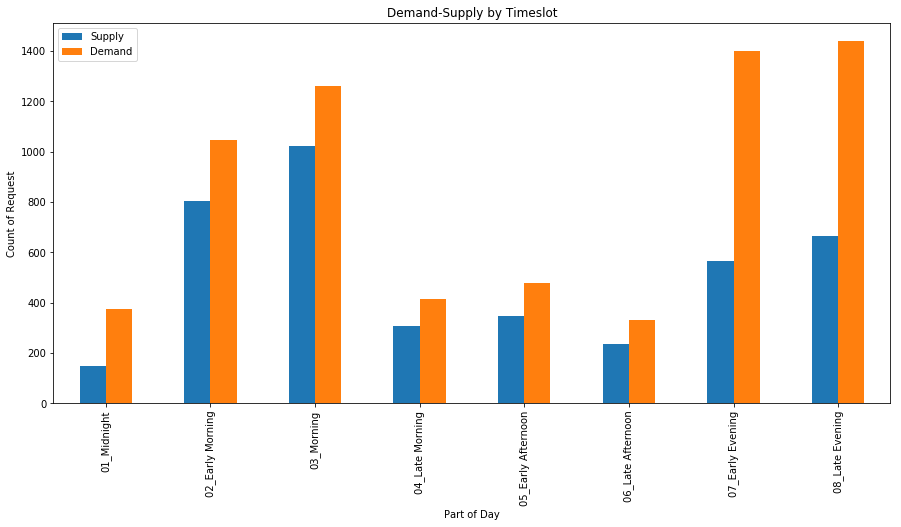

In [39]:
# To Identify the Demand - Supply gap 
#   Considered all types of requests. Demand = All requests, Supply = Accepted requests (Completed + Cancelled) 
 
# Count of all request over the timeslot -->  for Demand 
uber_cnt_bytimeslot = uber_req_df.groupby(by=['REQUEST_TIMESLOT']).agg({'REQ_STATUS': 'count'}) 
 
#Count of requests by acceptance ( Completed + Cancelled + no cars ) 
uber_cnt_bytimeslot_supp = uber_req_df.groupby(by=['REQUEST_TIMESLOT','REQ_STATUS']).agg({'REQ_STATUS': 'count'}) 
 
#selecting only Cars available (Completed + Cancelled) --> for Supply 
uber_cnt_bytimeslot_supp_car = uber_cnt_bytimeslot_supp.iloc[ 
    uber_cnt_bytimeslot_supp.index.get_level_values('REQ_STATUS') == 'Cars Available'] 
 
 
#joining Demand + Supply 
uber_dem_sup = uber_cnt_bytimeslot_supp_car.join(uber_cnt_bytimeslot,rsuffix='_Demand') 
 
 
#plotting in graph 
uber_dem_sup.unstack().sort_index().plot(kind='bar', stacked=False,figsize=(15,7) 
                                                     , title = "Demand-Supply by Timeslot") 
plt.legend(labels=["Supply","Demand"]) 
plt.xlabel("Part of Day") 
plt.ylabel("Count of Request") 
plt.show() 
 

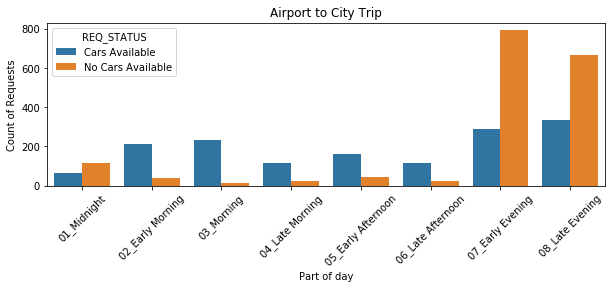

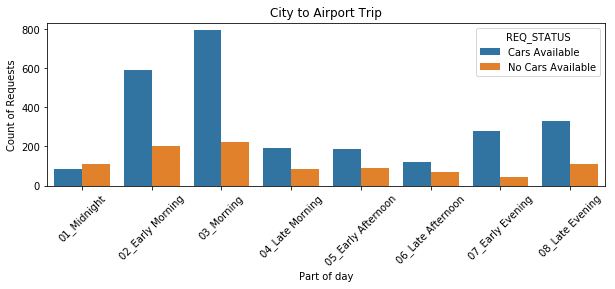

In [45]:
#To Identify the car availability throughout the timslot of the day based on the trip type

uber_cnt_bytimeslot_trip = uber_req_df.groupby(by=['REQUEST_TRIP','REQUEST_TIMESLOT',
                                                   'REQ_STATUS']).agg({'TRIP_STATUS': 'count'}) 

req_tot_cnt=  uber_cnt_bytimeslot_trip.reset_index() 
 
req_tot_cnt_city = req_tot_cnt.loc[req_tot_cnt["REQUEST_TRIP"] == "Airport to City"] 
req_tot_cnt_airport = req_tot_cnt.loc[req_tot_cnt["REQUEST_TRIP"] == "City to Airport"] 
 
plt.figure(figsize=(10, 3)) 
plt.title("Airport to City Trip") 
sns.barplot(x="REQUEST_TIMESLOT",y="TRIP_STATUS",hue="REQ_STATUS",data=req_tot_cnt_city) 
plt.xticks(rotation=45) 
plt.xlabel("Part of day") 
plt.ylabel("Count of Requests") 
plt.show() 
 
plt.figure(figsize=(10, 3)) 
plt.title("City to Airport Trip") 
sns.barplot(x="REQUEST_TIMESLOT",y="TRIP_STATUS",hue="REQ_STATUS",data=req_tot_cnt_airport) 
plt.xticks(rotation=45) 
plt.xlabel("Part of day") 
plt.ylabel("Count of Requests") 
plt.show() 

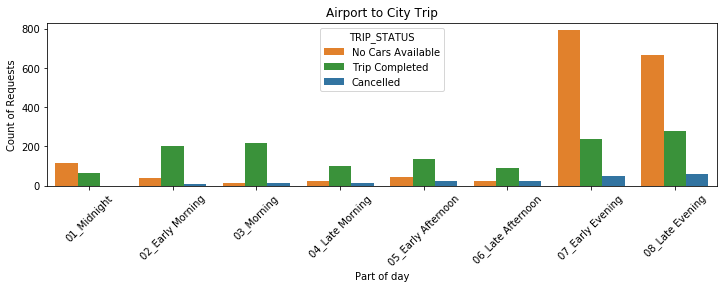

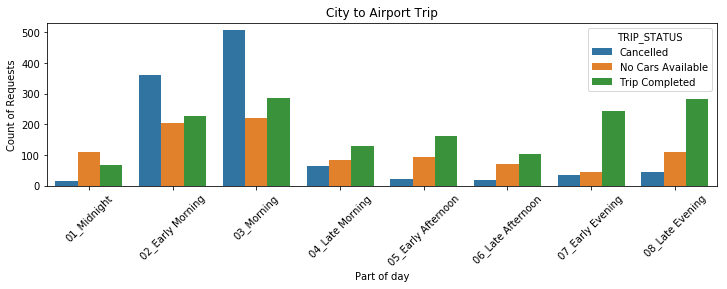

In [42]:
# TO Identify the Trip completion status through the timeslot of the day based on the Trip type
req_cnt_bytimeslot_trip = uber_req_df.groupby(by=['REQUEST_TRIP','REQUEST_TIMESLOT',
                                                  'TRIP_STATUS']).agg({'REQ_STATUS': 'count'}) 
req_tot_trip_cnt=  req_cnt_bytimeslot_trip.reset_index() 
 
 
 
req_trip_cnt_city = req_tot_trip_cnt.loc[req_tot_trip_cnt["REQUEST_TRIP"] == "Airport to City"] 

 
req_trip_cnt_airport = req_tot_trip_cnt.loc[req_tot_trip_cnt["REQUEST_TRIP"] == "City to Airport"] 

 
palette ={'Trip Completed':"C2",'Cancelled':"C0",'No Cars Available':"C1"} 
 

plt.figure(figsize=(12, 3)) 
plt.title("Airport to City Trip") 
sns.barplot(x="REQUEST_TIMESLOT",y="REQ_STATUS",hue="TRIP_STATUS",data=req_trip_cnt_city, palette=palette) 
plt.xticks(rotation=45) 
plt.xlabel("Part of day") 
plt.ylabel("Count of Requests") 
plt.show() 
 
plt.figure(figsize=(12, 3)) 
plt.title("City to Airport Trip") 
sns.barplot(x="REQUEST_TIMESLOT",y="REQ_STATUS",hue="TRIP_STATUS",data=req_trip_cnt_airport, palette=palette) 
plt.xticks(rotation=45) 
plt.xlabel("Part of day") 
plt.ylabel("Count of Requests") 
plt.show() 

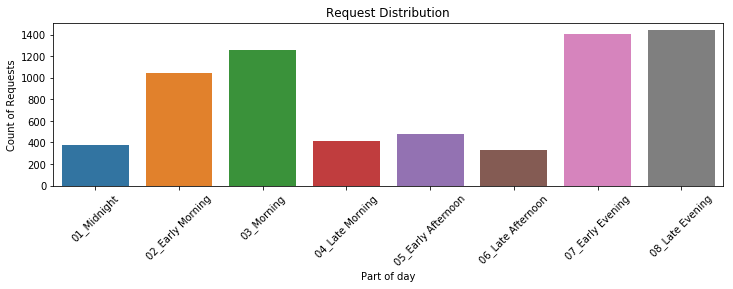

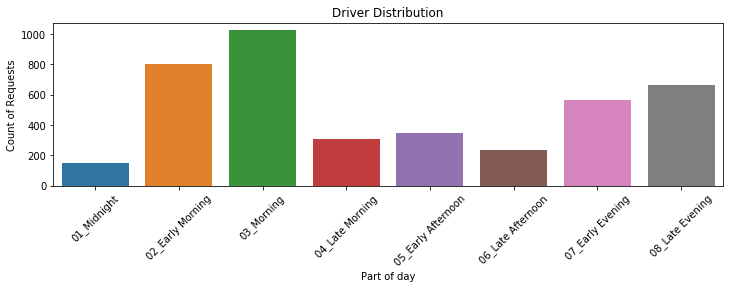

In [44]:
#To Identify the driver availability through out the day and also the frequency of requests which we uber receive

req_cnt = uber_req_df.groupby(by=['REQUEST_TIMESLOT']).agg({'REQ_STATUS': 'count'}) 
req_cnt = req_cnt.reset_index() 
 
plt.figure(figsize=(12, 3)) 
plt.title("Request Distribution") 
sns.barplot(x = "REQUEST_TIMESLOT",y="REQ_STATUS",data= req_cnt) 
plt.xticks(rotation=45) 
plt.xlabel("Part of day") 
plt.ylabel("Count of Requests") 
 

drv_avl = uber_req_df.loc[uber_req_df["DRIVER_ID"] != -1] 
drv_cnt = drv_avl.groupby(by=['REQUEST_TIMESLOT']).agg({'DRIVER_ID': 'count'}) 
drv_cnt = drv_cnt.reset_index() 
 
plt.figure(figsize=(12, 3)) 
plt.title("Driver Distribution") 
sns.barplot(x = "REQUEST_TIMESLOT",y="DRIVER_ID",data= drv_cnt) 
plt.xticks(rotation=45) 
plt.xlabel("Part of day") 
plt.ylabel("Count of Requests") 
plt.show()
 
